In [1]:
# Import library we need to use
import pandas as pd 
from sodapy import Socrata
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data in file .csv
data = pd.read_csv(r"C:\Users\Admin\Data python\39th_Ave_NE_Greenway_at_NE_62nd_St_Bicycle_Counter.csv", parse_dates= True)
data.head(20)

,Date,39th Ave NE Greenway at NE 62nd St Total,North,South
0,01/01/2014 12:00:00 AM,0.0,0.0,0.0
1,01/01/2014 01:00:00 AM,5.0,2.0,3.0
2,01/01/2014 02:00:00 AM,0.0,0.0,0.0
3,01/01/2014 03:00:00 AM,0.0,0.0,0.0
4,01/01/2014 04:00:00 AM,0.0,0.0,0.0
5,01/01/2014 05:00:00 AM,0.0,0.0,0.0
6,01/01/2014 06:00:00 AM,1.0,0.0,1.0
7,01/01/2014 07:00:00 AM,2.0,1.0,1.0
8,01/01/2014 08:00:00 AM,0.0,0.0,0.0
9,01/01/2014 09:00:00 AM,17.0,1.0,16.0


In [3]:
# Take a look at format of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38664 entries, 0 to 38663
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      38664 non-null  object 
 1   39th Ave NE Greenway at NE 62nd St Total  38660 non-null  float64
 2   North                                     38660 non-null  float64
 3   South                                     38660 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


In [4]:
# Change data type to a suitable type, (column date to numpy.datetime64)
data["Date"] = data["Date"].apply(pd.to_datetime)

# Set column "Date" as index of dataframe
data.set_index("Date", inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38664 entries, 2014-01-01 00:00:00 to 2018-05-02 14:00:00
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   39th Ave NE Greenway at NE 62nd St Total  38660 non-null  float64
 1   North                                     38660 non-null  float64
 2   South                                     38660 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [5]:
# Check if any value is Nan
data.isnull().any()

39th Ave NE Greenway at NE 62nd St Total    True
North                                       True
South                                       True
dtype: bool

In [6]:
# Drop Nan value from dataframe
data.dropna(inplace = True)
data.isnull().any()

39th Ave NE Greenway at NE 62nd St Total    False
North                                       False
South                                       False
dtype: bool

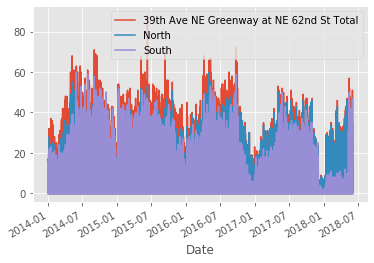

In [7]:
# We start to see raw data by plotting it
with plt.style.context("ggplot"):
    data.plot()

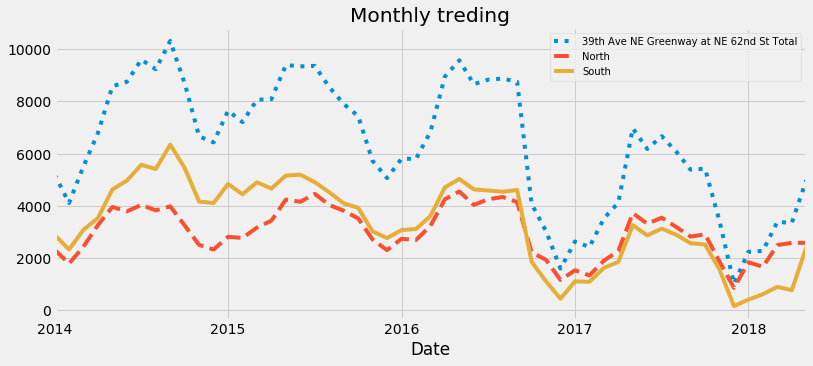

In [8]:
# We don't know anything with this plot so we will resample this data to month
monthly = data.resample("M").sum()

# Plot the monthly
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    monthly.plot(style = [':', '--', '-'], ax = ax)
    ax.set(title = "Monthly treding")
    plt.legend(prop={'size': 10})
    

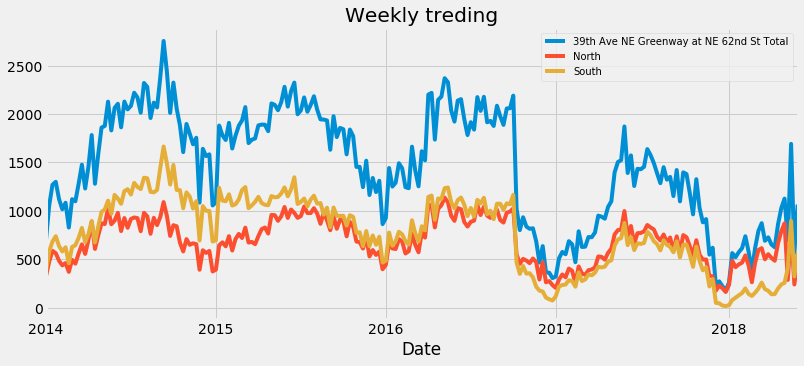

In [9]:
# We can see that quantity of bicycle through decrease by year. In order to gain more insight, we go deep down to weekly treding
weekly = data.resample("W").sum()

with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    weekly.plot(ax = ax)
    ax.set(title = "Weekly treding")
    plt.legend(prop={'size': 10})

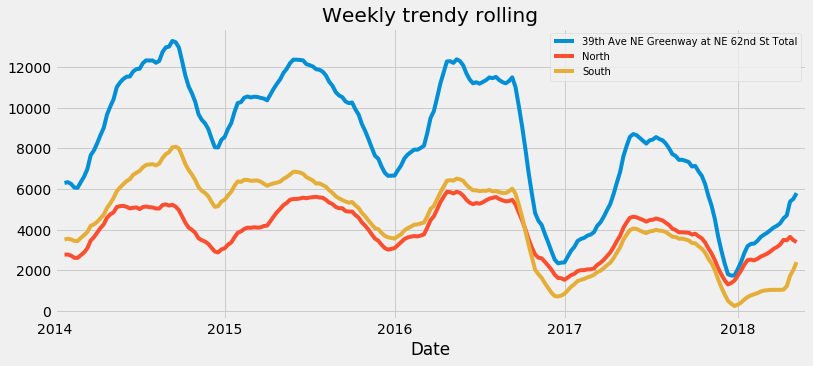

In [10]:
# We also can make this plot smoother by using rolling mean
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    weekly.rolling(7, center = True, win_type='gaussian').sum(std = 3).plot(ax = ax)
    ax.set(title = "Weekly trendy rolling")
    plt.legend(prop={'size': 10})

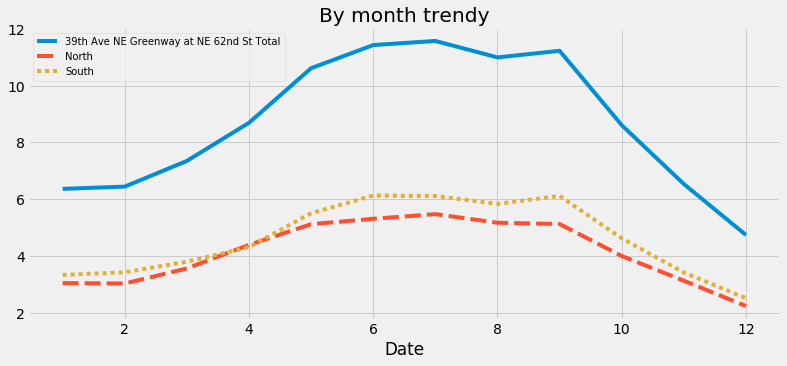

In [11]:
# We will go to deeper by researching trend by monnth
by_month = data.groupby(data.index.month).mean()

# Plot the month
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    sns.lineplot(ax = ax, data = by_month)
    ax.set(title = "By month trendy")
    plt.legend(prop={'size': 10})

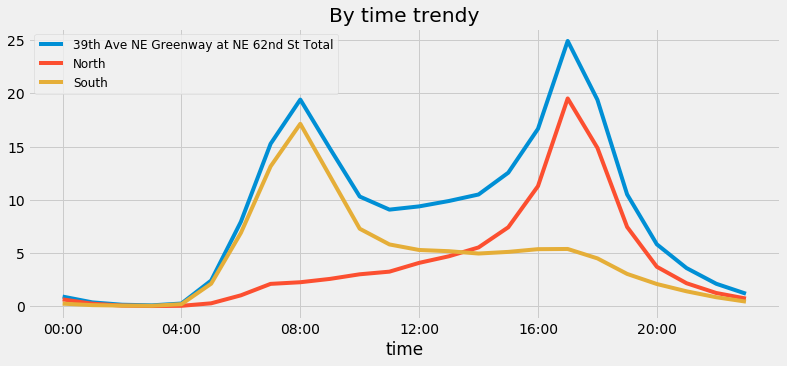

In [12]:
# We can see that people ride to the south slightly than to the north. Almost people ride from May to September.
# Now we dig into the trend by hour

by_time = data.groupby(data.index.time).mean()

#Set hourly xtick label
hourly_ticks = 4 * 60 * 60 * np.arange(6)

# Plot the month
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    by_time.plot(ax = ax, xticks = hourly_ticks)
    ax.set(title = "By time trendy")
    plt.legend(prop={'size': 12})

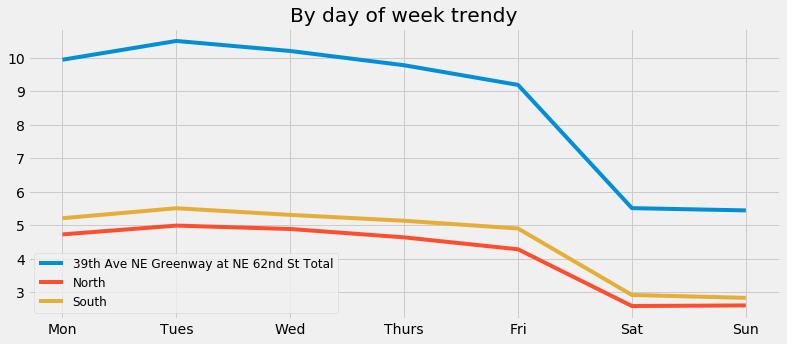

In [13]:
# We recognize trend by hour that most of people go to South at 08:00  and ride to South at 17:00
# Now we continuous to dig in to day in week
by_dayofweek = data.groupby(data.index.dayofweek).mean()
by_dayofweek.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Plot the month
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    by_dayofweek.plot(ax = ax)
    ax.set(title = "By day of week trendy")
    plt.legend(prop={'size': 12})

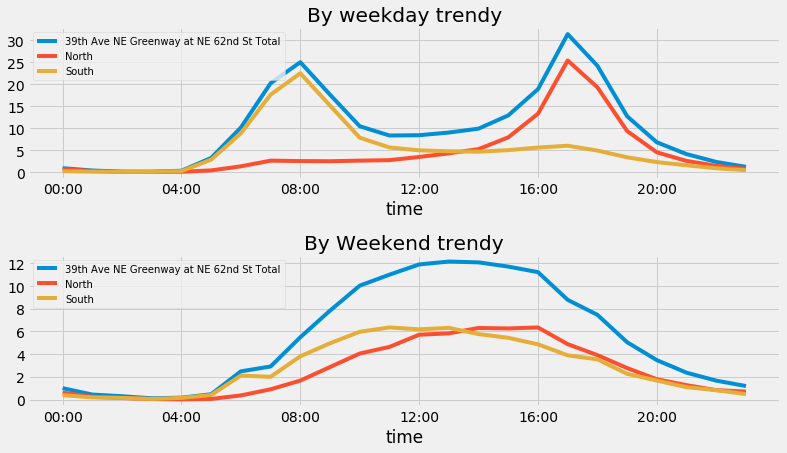

In [14]:
# We see different trend between weekend and weekday, now we will divide into 2 plot to see trendy of weekend vs weekday

weekend = np.where(data.index.dayofweek < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()

with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(2, 1 ,figsize = (12, 6.5))
    plt.subplots_adjust(hspace = 0.5)
# plot weekday trendy      
    by_time.loc['Weekday',:].plot(ax = ax[0], xticks = hourly_ticks)
    ax[0].set(title = "By weekday trendy")
    ax[0].legend(prop={'size': 10})
# plot weekend trendy  
    by_time.loc['Weekend',:].plot(ax = ax[1], xticks = hourly_ticks)
    ax[1].set(title = "By Weekend trendy")
    ax[1].legend(prop={'size': 10})

In [15]:
# Now we can distinguish the diffirent in bicycle trending in the weekday and the weekend. In weekday, people in Seattle usually go the south at 08:00 and go the north at 17:00. In weekend, they go the south at 11:00 and go the north at 15:00
# We will do more stuff by analyst riding trend with temperature, hour of daylight, weather.

In [16]:
# Now let explore percipitation in seattle
pepcipo = pd.read_csv(r"C:\Users\Admin\Data python\pep1.csv", parse_dates= True)
pepcipo.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD
0,US1WAKG0179,"SEATTLE 2.7 NE, WA US",2014-01-02,2.0,0.06,NaN,NaN,NaN,NaN
1,US1WAKG0179,"SEATTLE 2.7 NE, WA US",2014-01-03,NaN,NaN,0.32,NaN,NaN,NaN
2,US1WAKG0179,"SEATTLE 2.7 NE, WA US",2014-01-06,3.0,0.05,NaN,NaN,NaN,NaN
3,US1WAKG0179,"SEATTLE 2.7 NE, WA US",2014-01-07,NaN,NaN,0.23,NaN,NaN,NaN
4,US1WAKG0179,"SEATTLE 2.7 NE, WA US",2014-01-08,NaN,NaN,0.23,NaN,NaN,NaN


In [17]:
# We remove column 1, 2 which not neccesscary for analyst
pepcipo.drop(columns=['STATION', 'NAME', 'SNOW', 'DAPR', 'SNWD', 'WESD','MDPR'], inplace = True)
pepcipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    662 non-null    object 
 1   PRCP    518 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [18]:
# Set date column as index in dataframe and repalce nan value with 0
pepcipo["DATE"] = pepcipo["DATE"].apply(pd.to_datetime)
pepcipo.set_index("DATE", inplace = True)
pepcipo.replace(np.nan, 0, inplace = True)
pepcipo.isnull().any()

PRCP    False
dtype: bool

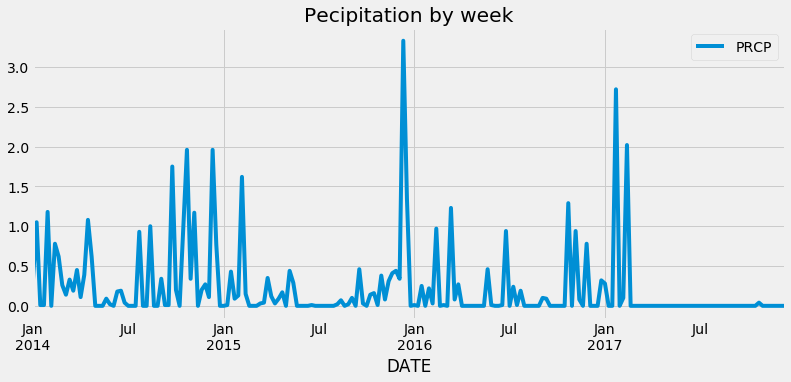

In [19]:
# Resample pepcipo to week anh visualize it
pep_by_week = pepcipo.resample("W").sum()
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,5))
    pep_by_week.plot(ax = ax)
    plt.title("Pecipitation by week")

In [20]:
# Join data of pep by week with bicycle counter by week ("weekly")
total_data = weekly.join(pep_by_week)
total_data.rename(columns={'39th Ave NE Greenway at NE 62nd St Total':'total'}, inplace=True)
total_data.dropna(inplace = True)

# Add column day to caculate the change of the rider
total_data['weekcount'] = np.arange(len(total_data))

In [21]:
total_data.tail()

,total,North,South,PRCP,weekcount
Date,,,,,
2017-11-12,881.0,496.0,385.0,0.0,201
2017-11-19,914.0,497.0,417.0,0.0,202
2017-11-26,547.0,329.0,218.0,0.0,203
2017-12-03,618.0,323.0,295.0,0.0,204
2017-12-10,224.0,176.0,48.0,0.0,205


In [22]:
# We use Linear Regression to predict the trend of the rider
from sklearn.linear_model import LinearRegression

X = total_data[["PRCP",'weekcount']]
y = total_data['total']
clf = LinearRegression().fit(X, y)

total_data['pep_trend'] = clf.predict(X)


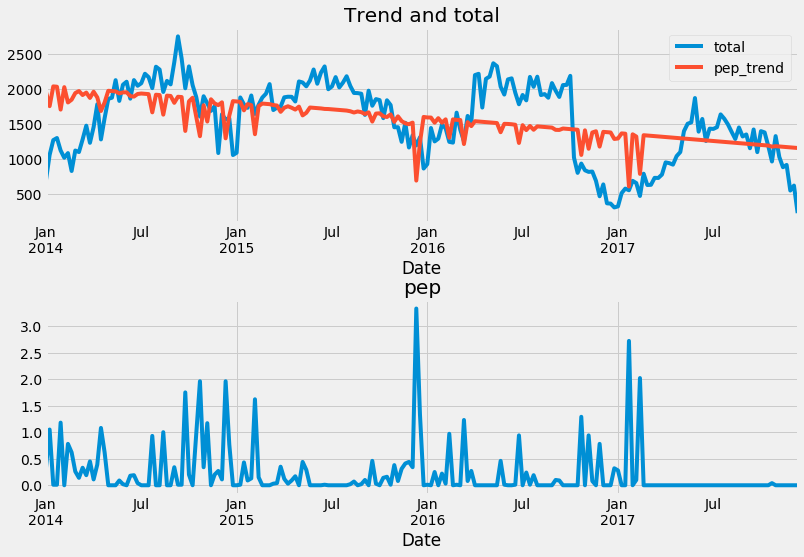

In [23]:
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    plt.subplots_adjust(hspace = 0.4)
    total_data[['total', 'pep_trend']].plot(ax = ax[0])
    ax[0].set(title = "Trend and total")
    total_data["PRCP"].plot(ax = ax[1])
    ax[1].set(title = "pep")

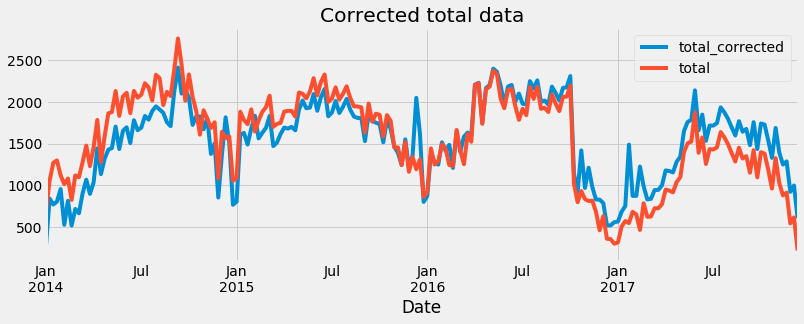

In [24]:
# De trend the data to remove trend affected by pecipitation
total_data['total_corrected'] = total_data['total'] - total_data['pep_trend'] + total_data['pep_trend'].mean()
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(figsize = (12,4))
    total_data[['total_corrected', 'total']].plot(ax = ax)
    ax.set(title = "Corrected total data")

In [25]:
# We can see that the diffirent in the end of 2015, 2016, 2017 and the early of 2017. Because, there more factor affect to the rider like the snow and the tempeture which we haven't take into account in the dataset. With tempeture, daylight, we can de-trend data and know the insight of growth of cyclist.
# Now let see the model tell us about affection of percipitation

In [28]:
#How Does Rain Affect Ridership?
slope = clf.coef_[0]
print("{0:.0f} daily crossings lost per inch of rain".format(-slope))

276 daily crossings lost per inch of rain


In [32]:
# Is Ridership Increasing?
slope = clf.coef_[1]
print("{0:.1f} riders decrease per week".format(-slope))

4.4 riders decrease per week


In [37]:
slope = clf.coef_[1]
print("({0:.1f} %) riders decrease per year".format((-slope) / 7 * 365 * 100 / total_data['total'].mean()))

(14.7 %) riders decrease per year


In [ ]:
# If we don't care about tempeture, daylight we can concluse that the volumn of cyclist go through NE 62nd St in Seattle have decreased.